Found 0 images belonging to 0 classes.


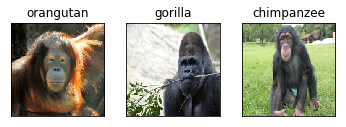

In [7]:
#以下のコードでモデルを実際に使って見ている
from keras.models import model_from_json
import matplotlib.pyplot as plt
import numpy as np
import os,random
from keras.preprocessing.image import img_to_array, load_img
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D,Input
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD

#hdf5ファイルの名前をfile_nameにつける。試したい画像が入ったフォルダの名前をtest_dirとdisplay_dirにつける。ここではtest_4という名のフォルダを使っている。labelの名前も変える。左の該当箇所の色が変になっているかもしれないから気をつける。そういうときは、打ち直すと直る。

file_name='fruits'
test_dir='sample2'
display_dir='sample2'
label=['chimpanzee','gorilla','orangutan']

#load model and weights
#json_string=open(file_name+'.json').read()
#model=model_from_json(json_string)

#Modelの再構築
N_CATEGORIES  = 3
IMAGE_SIZE = 224
BATCH_SIZE = 16
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
base_model = VGG16(weights='imagenet', include_top=False,input_tensor=input_tensor)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(N_CATEGORIES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.load_weights(file_name+'.hdf5')

model.compile(optimizer=SGD(lr=0.0001,momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#data generate
test_datagen=ImageDataGenerator(rescale=1.0/255)

test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

#evaluate model
#score=model.evaluate_generator(test_generator)
#print('\n test loss:',score[0])
#print('\n test_acc:',score[1])

#predict model and display images
files=os.listdir(display_dir)
filenumber=len(files)
img=random.sample(files,filenumber)

plt.figure(figsize=(10,10))
for i in range(filenumber):
    temp_img=load_img(os.path.join(display_dir,img[i]),target_size=(224,224))
    plt.subplot(5,5,i+1)
    plt.imshow(temp_img)
    #Images normalization
    temp_img_array=img_to_array(temp_img)
    temp_img_array=temp_img_array.astype('float32')/255.0
    temp_img_array=temp_img_array.reshape((1,224,224,3))
    #predict image
    img_pred=model.predict(temp_img_array)
    plt.title(label[np.argmax(img_pred)])
    #eliminate xticks,yticks
    plt.xticks([]),plt.yticks([])


plt.show()
